In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-11-24T00:03:56.199268+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.1.3
seaborn: 0.13.2
pandas : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2024-11-07-scientific"
teeplot_subdir


'2024-11-07-scientific'

## Prep Data


In [5]:
df = pd.read_csv("https://osf.io/vrhk4/download")
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,job,replicate,num_taxa
count,39984.000000,35119.000000,39984.000000,35119.000000,39984.000000,39984.000000,39984.000000
mean,0.638455,0.641789,0.622799,0.709075,9.000000,1.500000,10.714286
std,0.648395,0.654548,0.484692,0.454196,5.269288,1.118048,7.591712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,0.750000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,9.000000,1.500000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,13.000000,2.250000,18.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,3.000000,25.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model
0,Consider the following phylogenetic trees:\n\n...,"no, the phylogenies are different|yes, the phy...",1,1,1.0,1.0,1.0,2024-11-08T09:57:08.248617,0,0,question_equivalence_identical,3,newick,sample_phylogeny_newick,gpt-4o-mini
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-08T09:57:08.558459,0,0,question_equivalence_identical,3,json,sample_phylogeny_newick,gpt-4o-mini
2,Do the two given phylogenies represent the sam...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-08T09:57:08.859771,0,0,question_equivalence_identical,3,none,sample_phylogeny_newick,gpt-4o-mini
3,Consider the following phylogenetic trees:\n\n...,"no, the phylogenies are different|yes, the phy...",1,1,1.0,1.0,1.0,2024-11-08T09:57:09.180317,0,0,question_equivalence_identical,3,newick,scientific_phylogeny_newick,gpt-4o-mini
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-08T09:57:09.469197,0,0,question_equivalence_identical,3,json,scientific_phylogeny_newick,gpt-4o-mini


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model
39979,Consider the following phylogenetic tree:\n\n{...,T05|neither|T13,0,1,0.0,0.0,0.0,2024-11-08T10:19:52.425175,9,3,question_most_related_to_x,25,json,sample_phylogeny_newick,gpt-4o
39980,Which among T22 and T19 are most closely relat...,T19|neither|T22,2,2,2.0,1.0,1.0,2024-11-08T10:19:52.734463,9,3,question_most_related_to_x,25,none,sample_phylogeny_newick,gpt-4o
39981,Consider the following phylogenetic tree:\n\n[...,neither|Agapornis roseicollis|Agalychnis lemur,0,0,0.0,1.0,1.0,2024-11-08T10:19:53.346504,9,3,question_most_related_to_x,25,newick,scientific_phylogeny_newick,gpt-4o
39982,Consider the following phylogenetic tree:\n\n{...,Agapornis roseicollis|neither|Equus zebra,1,1,1.0,1.0,1.0,2024-11-08T10:19:54.164946,9,3,question_most_related_to_x,25,json,scientific_phylogeny_newick,gpt-4o
39983,Which among Equus zebra and Bos taurus are mos...,Bos taurus|neither|Equus zebra,0,1,0.0,0.0,0.0,2024-11-08T10:19:54.371330,9,3,question_most_related_to_x,25,none,scientific_phylogeny_newick,gpt-4o


In [6]:
df["Q"] = df["question"].str.slice(9)


In [7]:
df["num choices"] = df["choices"].str.count(r"\|") + 1


In [8]:
df["adj score"] = df["score"] * df["num choices"]


In [9]:
df["tree repr"] = df["tree representation"]


In [10]:
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,job,replicate,num_taxa,num choices,adj score
count,39984.000000,35119.000000,39984.000000,35119.000000,39984.000000,39984.000000,39984.000000,39984.000000,39984.000000
mean,0.638455,0.641789,0.622799,0.709075,9.000000,1.500000,10.714286,2.285714,1.443402
std,0.648395,0.654548,0.484692,0.454196,5.269288,1.118048,7.591712,0.451760,1.181881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,0.750000,4.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,9.000000,1.500000,8.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,13.000000,2.250000,18.000000,3.000000,2.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,3.000000,25.000000,3.000000,3.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model,Q,num choices,adj score,tree repr
0,Consider the following phylogenetic trees:\n\n...,"no, the phylogenies are different|yes, the phy...",1,1,1.0,1.0,1.0,2024-11-08T09:57:08.248617,0,0,question_equivalence_identical,3,newick,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,newick
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-08T09:57:08.558459,0,0,question_equivalence_identical,3,json,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,json
2,Do the two given phylogenies represent the sam...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-08T09:57:08.859771,0,0,question_equivalence_identical,3,none,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,0.0,none
3,Consider the following phylogenetic trees:\n\n...,"no, the phylogenies are different|yes, the phy...",1,1,1.0,1.0,1.0,2024-11-08T09:57:09.180317,0,0,question_equivalence_identical,3,newick,scientific_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,newick
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-08T09:57:09.469197,0,0,question_equivalence_identical,3,json,scientific_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,json


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model,Q,num choices,adj score,tree repr
39979,Consider the following phylogenetic tree:\n\n{...,T05|neither|T13,0,1,0.0,0.0,0.0,2024-11-08T10:19:52.425175,9,3,question_most_related_to_x,25,json,sample_phylogeny_newick,gpt-4o,most_related_to_x,3,0.0,json
39980,Which among T22 and T19 are most closely relat...,T19|neither|T22,2,2,2.0,1.0,1.0,2024-11-08T10:19:52.734463,9,3,question_most_related_to_x,25,none,sample_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,none
39981,Consider the following phylogenetic tree:\n\n[...,neither|Agapornis roseicollis|Agalychnis lemur,0,0,0.0,1.0,1.0,2024-11-08T10:19:53.346504,9,3,question_most_related_to_x,25,newick,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,newick
39982,Consider the following phylogenetic tree:\n\n{...,Agapornis roseicollis|neither|Equus zebra,1,1,1.0,1.0,1.0,2024-11-08T10:19:54.164946,9,3,question_most_related_to_x,25,json,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,json
39983,Which among Equus zebra and Bos taurus are mos...,Bos taurus|neither|Equus zebra,0,1,0.0,0.0,0.0,2024-11-08T10:19:54.371330,9,3,question_most_related_to_x,25,none,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,0.0,none


## Tree Repr Comparison


teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=True+kind=line+model=gpt-4o+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=True+kind=line+model=gpt-4o+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


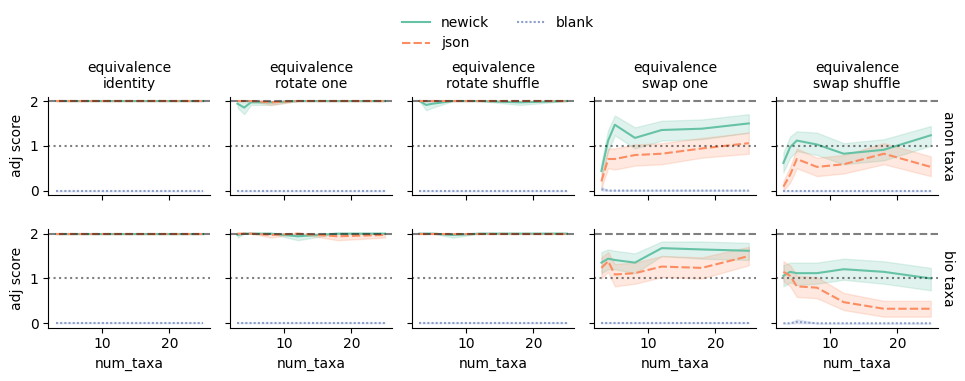

teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=True+kind=line+model=gpt-4o-mini+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=True+kind=line+model=gpt-4o-mini+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


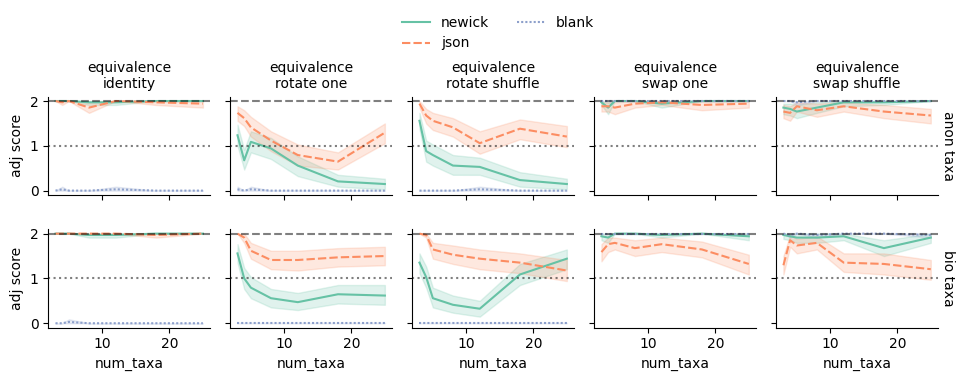

In [11]:
for model, group in df[df["Q"].str.contains("equivalence")].groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group.replace(
            {
                "sample_phylogeny_newick": "anon taxa",
                "scientific_phylogeny_newick": "bio taxa",
                "none": "blank",
                "equivalence_identical": "equivalence\nidentity",
                "equivalence_rotate_tree": "equivalence\nrotate one",
                "equivalence_shufflerotate_tree": "equivalence\nrotate shuffle",
                "equivalence_swap_taxa": "equivalence\nswap one",
                "equivalence_shuffle_taxa": "equivalence\nswap shuffle",
            },
        ),
        x="num_taxa",
        y="adj score",
        hue="tree repr",
        style="tree repr",
        col="Q",
        row="tree source",
        aspect=1.2,
        height=1.7,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="Set2",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
            is_equivalence=True,
        ),
        teeplot_subdir=teeplot_subdir,
    )
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.45, 0.95),
        frameon=False,
        ncol=2,
        title=None,
    )
    teed.set(ylim=(-0.1, 2.1))
    teed.refline(y=1.0, linestyle=":", color="black", alpha=0.5)
    teed.refline(y=2.0, linestyle="--", color="black", alpha=0.5)
    teed.set_titles(col_template="{col_name}", row_template="{row_name}")
    teed.tight_layout()
    saveit()


teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=False+kind=line+model=gpt-4o+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=False+kind=line+model=gpt-4o+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


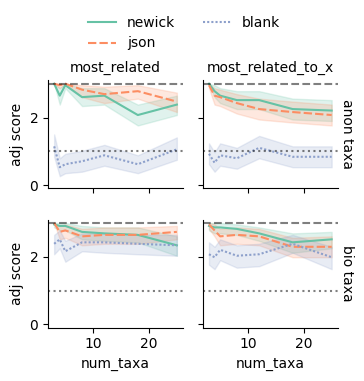

teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=False+kind=line+model=gpt-4o-mini+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-repr+is_equivalence=False+kind=line+model=gpt-4o-mini+palette=set2+row=tree-source+style=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


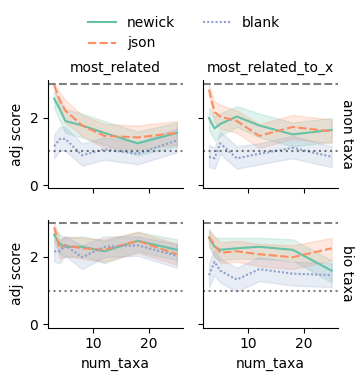

In [12]:
for model, group in df[~df["Q"].str.contains("equivalence")].groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group.replace(
            {
                "sample_phylogeny_newick": "anon taxa",
                "scientific_phylogeny_newick": "bio taxa",
                "identify_most_related": "most_related",
                "none": "blank",
            },
        ),
        x="num_taxa",
        y="adj score",
        hue="tree repr",
        style="tree repr",
        col="Q",
        row="tree source",
        aspect=1.2,
        height=1.7,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="Set2",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
            is_equivalence=False,
        ),
        teeplot_subdir=teeplot_subdir,
    )
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.4, 0.95),
        frameon=False,
        ncol=2,
        title=None,
    )
    teed.set(ylim=(-0.1, 3.1))
    teed.refline(y=1.0, linestyle=":", color="black", alpha=0.5)
    teed.refline(y=3.0, linestyle="--", color="black", alpha=0.5)
    teed.set_titles(col_template="{col_name}", row_template="{row_name}")
    teed.tight_layout()

    saveit()


## Taxa Type Comparison


teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=True+kind=line+model=gpt-4o+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=True+kind=line+model=gpt-4o+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.png


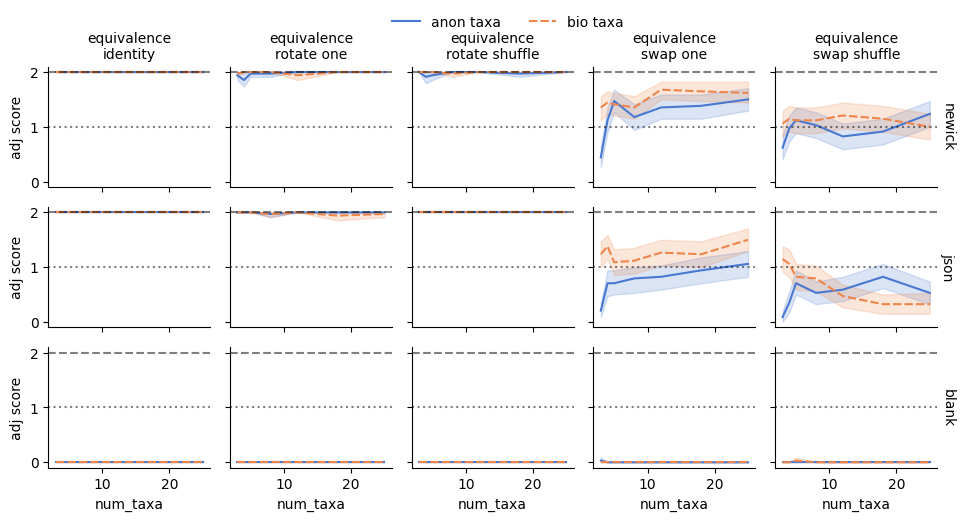

teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=True+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=True+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.png


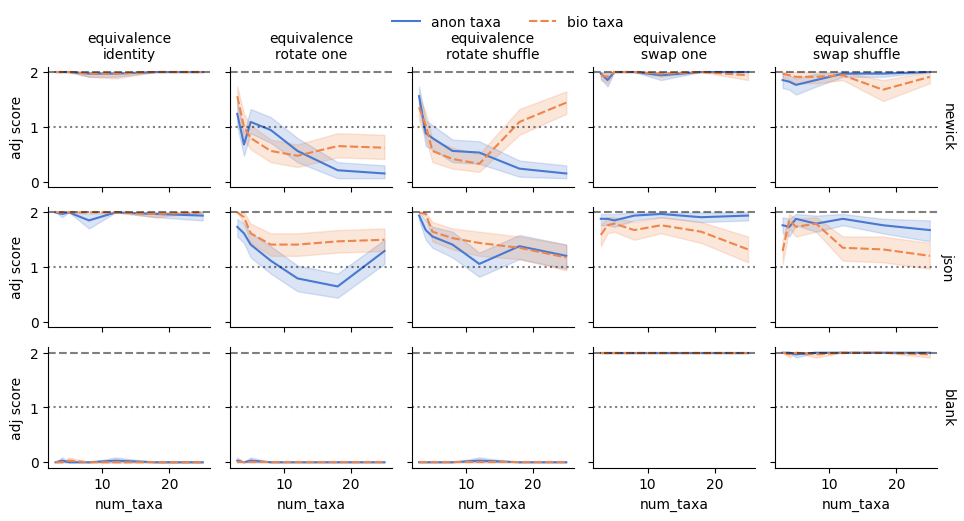

In [13]:
for model, group in df[df["Q"].str.contains("equivalence")].groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group.replace(
            {
                "sample_phylogeny_newick": "anon taxa",
                "scientific_phylogeny_newick": "bio taxa",
                "none": "blank",
                "equivalence_identical": "equivalence\nidentity",
                "equivalence_rotate_tree": "equivalence\nrotate one",
                "equivalence_shufflerotate_tree": "equivalence\nrotate shuffle",
                "equivalence_swap_taxa": "equivalence\nswap one",
                "equivalence_shuffle_taxa": "equivalence\nswap shuffle",
            },
        ),
        x="num_taxa",
        y="adj score",
        hue="tree source",
        style="tree source",
        col="Q",
        row="tree repr",
        aspect=1.2,
        height=1.7,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="muted",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
            is_equivalence=True,
        ),
        teeplot_subdir=teeplot_subdir,
    )
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.45, 0.95),
        frameon=False,
        ncol=2,
        title=None,
    )
    teed.set(ylim=(-0.1, 2.1))
    teed.refline(y=1.0, linestyle=":", color="black", alpha=0.5)
    teed.refline(y=2.0, linestyle="--", color="black", alpha=0.5)
    teed.set_titles(col_template="{col_name}", row_template="{row_name}")
    teed.tight_layout()

    saveit()


teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=False+kind=line+model=gpt-4o+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=False+kind=line+model=gpt-4o+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.png


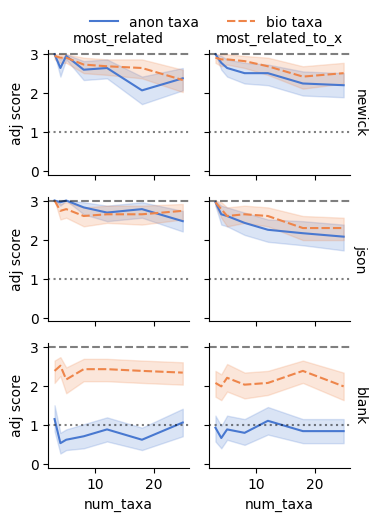

teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=False+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+is_equivalence=False+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+style=tree-source+viz=relplot+x=num-taxa+y=adj-score+ext=.png


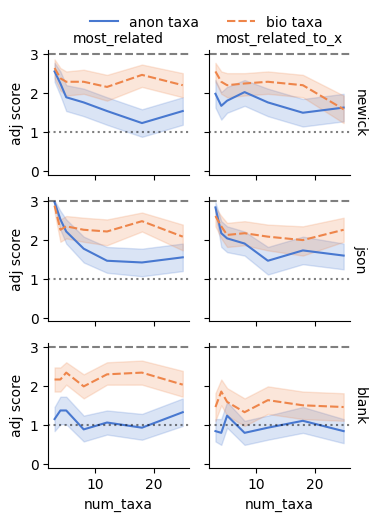

In [14]:
for model, group in df[~df["Q"].str.contains("equivalence")].groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group.replace(
            {
                "sample_phylogeny_newick": "anon taxa",
                "scientific_phylogeny_newick": "bio taxa",
                "identify_most_related": "most_related",
                "none": "blank",
            },
        ),
        x="num_taxa",
        y="adj score",
        hue="tree source",
        style="tree source",
        col="Q",
        row="tree repr",
        aspect=1.2,
        height=1.7,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="muted",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
            is_equivalence=False,
        ),
        teeplot_subdir=teeplot_subdir,
    )
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.4, 0.95),
        frameon=False,
        ncol=2,
        title=None,
    )
    teed.set(ylim=(-0.1, 3.1))
    teed.refline(y=1.0, linestyle=":", color="black", alpha=0.5)
    teed.refline(y=3.0, linestyle="--", color="black", alpha=0.5)
    teed.set_titles(col_template="{col_name}", row_template="{row_name}")
    teed.tight_layout()
    saveit()


## Model Comparison


teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=True+kind=line+palette=accent+repr_=json+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=True+kind=line+palette=accent+repr_=json+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.png


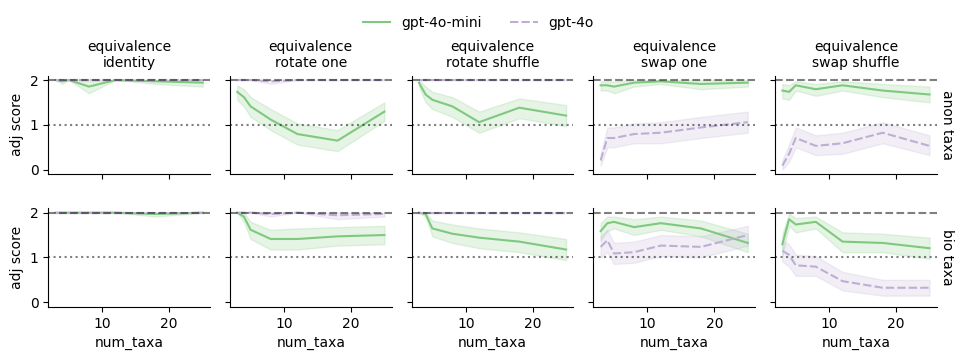

teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=True+kind=line+palette=accent+repr_=newick+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=True+kind=line+palette=accent+repr_=newick+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.png


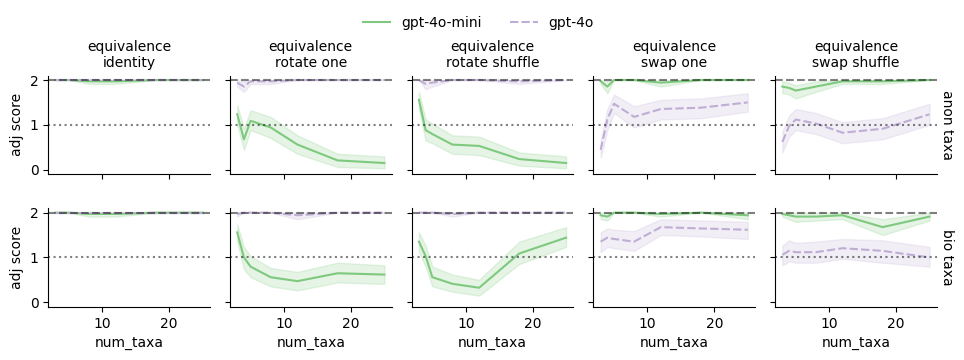

teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=True+kind=line+palette=accent+repr_=none+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=True+kind=line+palette=accent+repr_=none+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.png


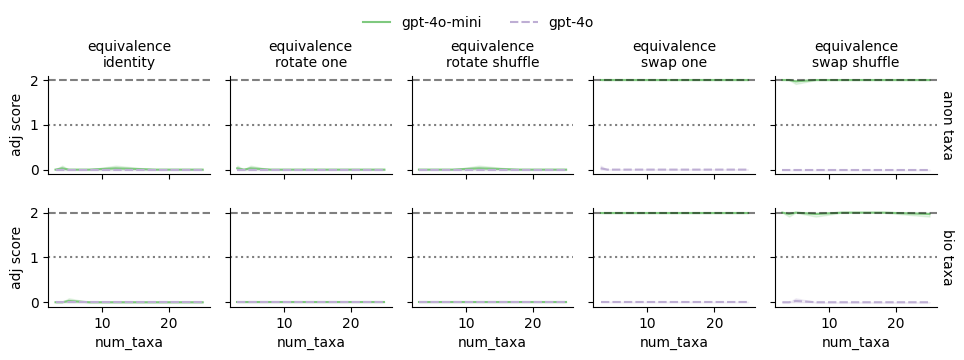

In [15]:
for repr_, group in df[df["Q"].str.contains("equivalence")].groupby(
    "tree repr"
):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group.replace(
            {
                "sample_phylogeny_newick": "anon taxa",
                "scientific_phylogeny_newick": "bio taxa",
                "none": "blank",
                "equivalence_identical": "equivalence\nidentity",
                "equivalence_rotate_tree": "equivalence\nrotate one",
                "equivalence_shufflerotate_tree": "equivalence\nrotate shuffle",
                "equivalence_swap_taxa": "equivalence\nswap one",
                "equivalence_shuffle_taxa": "equivalence\nswap shuffle",
            },
        ),
        x="num_taxa",
        y="adj score",
        hue="model",
        style="model",
        col="Q",
        row="tree source",
        aspect=1.2,
        height=1.7,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="Accent",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            repr_=repr_,
            is_equivalence=True,
        ),
        teeplot_subdir=teeplot_subdir,
    )
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.42, 0.95),
        frameon=False,
        ncol=2,
        title=None,
    )
    teed.set(ylim=(-0.1, 2.1))
    teed.refline(y=1.0, linestyle=":", color="black", alpha=0.5)
    teed.refline(y=2.0, linestyle="--", color="black", alpha=0.5)
    teed.set_titles(col_template="{col_name}", row_template="{row_name}")
    teed.tight_layout()
    saveit()


teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=False+kind=line+palette=accent+repr_=json+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=False+kind=line+palette=accent+repr_=json+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.png


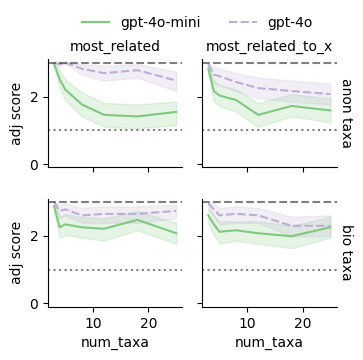

teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=False+kind=line+palette=accent+repr_=newick+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=False+kind=line+palette=accent+repr_=newick+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.png


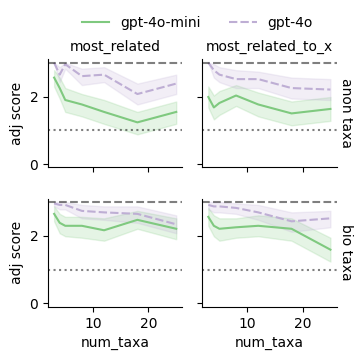

teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=False+kind=line+palette=accent+repr_=none+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=model+is_equivalence=False+kind=line+palette=accent+repr_=none+row=tree-source+style=model+viz=relplot+x=num-taxa+y=adj-score+ext=.png


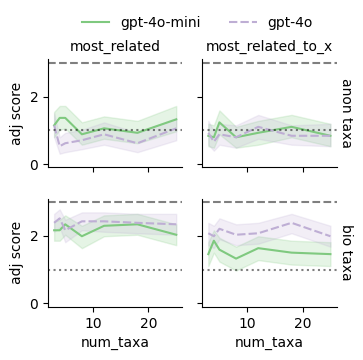

In [16]:
for repr_, group in df[~df["Q"].str.contains("equivalence")].groupby(
    "tree repr"
):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group.replace(
            {
                "sample_phylogeny_newick": "anon taxa",
                "scientific_phylogeny_newick": "bio taxa",
                "identify_most_related": "most_related",
                "none": "blank",
            },
        ),
        x="num_taxa",
        y="adj score",
        hue="model",
        style="model",
        col="Q",
        row="tree source",
        aspect=1.2,
        height=1.7,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="Accent",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            repr_=repr_,
            is_equivalence=False,
        ),
        teeplot_subdir=teeplot_subdir,
    )
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.4, 0.95),
        frameon=False,
        ncol=2,
        title=None,
    )
    teed.set(ylim=(-0.1, 3.1))
    teed.refline(y=1.0, linestyle=":", color="black", alpha=0.5)
    teed.refline(y=3.0, linestyle="--", color="black", alpha=0.5)
    teed.set_titles(col_template="{col_name}", row_template="{row_name}")
    teed.tight_layout()
    saveit()
